In [1]:
import pandas as pd
position_statistics = pd.read_csv("position_statistics.csv")

In [2]:
position_statistics.head()


,jobCategories,responsibility,qualifications,preferredRequirements,count,techStacks
0,서버/백엔드 개발자,"['• 개발자들에 대한 technical leading 및 지원\n• 기상, 해양 ...",['• 7년 이상 백엔드 개발 및 서비스 운영 경험이 있는 분 혹은 그에 준하신 분...,['• 개발팀장 혹은 개발 리더 경험이 있으신 분\n• 레거시 시스템 개선 경험 및...,511,"{'spring boot': 106, 'thymeleaf': 4, 'java': 2..."
1,빅데이터 엔지니어,"[""[ The Impact You'll Be Contributing to Moloc...",['• Bachelor’s degree in a quantitative discip...,['• Advanced degree such as Master’s or PhD in...,71,"{'r': 19, 'machinelearning': 18, 'python': 53,..."
2,인공지능/머신러닝,['• 사전에 학습된 ChatGPT 모델을 의료 도메인 데이터로 미세 조정하여 챗봇...,['• 경력 : 동종업(AI 서비스 개발/운영) 2년 이상 또는 그에 준하는 역량을...,['• 헬스케어 분야에서의 경험이 있으신 분\n• 자연어 생성 모델(LLM) 관련 ...,119,"{'linux': 18, 'tensorflow': 63, 'python': 87, ..."
3,웹 풀스택 개발자,"['• AI, LLM 기반의 응용 서비스, 솔루션 신규 개발 프로젝트의 개발 파트를...",['• 풀스택 소프트웨어 엔지니어 실무 개발 경력이 5년 이상인 분\n• 데이터 구...,['• 컴퓨터공학 또는 관련 학문을 전공하신 분\n• 주도적으로 문제를 발견하고 개...,170,"{'gcp': 1, 'git': 28, 'django': 3, 'react': 48..."
4,SW/솔루션,['• LINUX Application/Service Programming \n• ...,['• 학사 이상\n• 전산/정보통신 계열 \n• 경력 3년 ~ 10년\n• Arm...,['• 전기차 충전기 Application 개발 경험 \n• Cloud Server...,416,"{'sw': 218, 'linux': 88, 'c++': 243, 'qt': 22,..."


In [3]:
# 직무별 요구하는 프로그래밍 언어 비율 구하기
# print(min(len(p) for p in position_statistics.techStacks)) # 17

from collections import Counter
def top_n(row):
    n = 17
    stacks = Counter(row).most_common(n)
    return {stacks[i][0]: stacks[i][1] for i in range(n)}

def ratio(row):
    n = 17
    stacks, count = row
    stacks = dict(Counter({stack: round(100* num / count, 2) for stack, num in stacks.items()}).most_common(n))
    return stacks

position_statistics["techStacks"] = position_statistics.techStacks.apply(lambda x: eval(x)) # str -> dict
position_statistics['techStacksTopN'] = position_statistics.techStacks.apply(top_n) # most required stack num
position_statistics['techStacksTopN'] = position_statistics[['techStacks', 'count']].apply(ratio, axis=1)   # num -> ratio
total = sum(map(int, position_statistics["count"]))
position_statistics['jobPortion'] = position_statistics.apply(lambda x: round(100 * int(x["count"]) / total, 2), axis=1)    # job position ratio

In [4]:
data = position_statistics[['jobCategories', 'jobPortion', 'techStacksTopN']].sort_values(by='jobPortion', ascending=False, ignore_index=True)
data

,jobCategories,jobPortion,techStacksTopN
0,서버/백엔드 개발자,21.33,"{'java': 46.18, 'aws': 43.84, 'mysql': 30.53, ..."
1,SW/솔루션,17.36,"{'c++': 58.41, 'sw': 52.4, 'c': 44.47, 'c#': 3..."
2,프론트엔드 개발자,12.02,"{'react': 77.43, 'javascript': 65.28, 'typescr..."
3,HW/임베디드,7.35,"{'hw': 53.41, 'fw': 40.34, 'c': 35.23, 'c++': ..."
4,웹 풀스택 개발자,7.10,"{'java': 58.24, 'javascript': 54.12, 'react': ..."
5,devops/시스템 엔지니어,6.72,"{'linux': 42.24, 'aws': 29.81, 'kubernetes': 2..."
6,인공지능/머신러닝,4.97,"{'python': 73.11, 'pytorch': 55.46, 'tensorflo..."
7,안드로이드 개발자,3.09,"{'android os': 95.95, 'kotlin': 79.73, 'java':..."
8,빅데이터 엔지니어,2.96,"{'python': 74.65, 'sql': 45.07, 'r': 26.76, 'm..."
9,기술지원,2.71,"{'linux': 41.54, 'network': 21.54, 'sw': 21.54..."


In [5]:
data.to_json('stack_statistics_by_position.json', orient='index', force_ascii=False, indent=4)

C:\Users\r2com\AppData\Local\Temp\ipykernel_21228\142240852.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positions = [position[1][0] for position in data.iterrows()]
C:\Users\r2com\AppData\Local\Temp\ipykernel_21228\142240852.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_p = [position[1][1] for position in data.iterrows()]


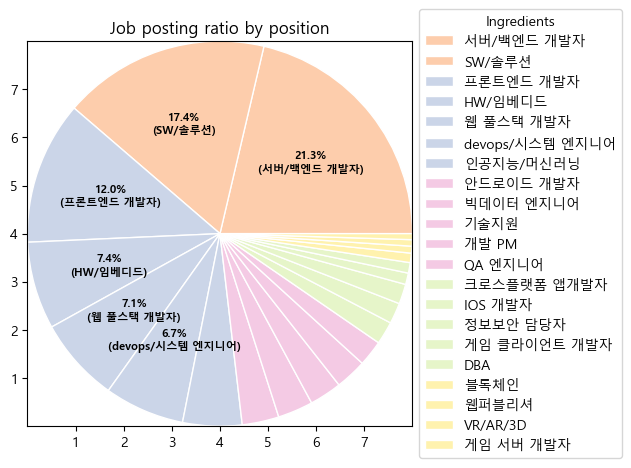

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

index = 0
def func(pct, val):
    global index
    index += 1
    if pct >= 5:
       return f'{pct:.1f}%\n({val[index-1]})'
    return ''
    
colors = plt.get_cmap('Pastel2')(np.linspace(0.2, 0.7, len(data)))
positions = [position[1][0] for position in data.iterrows()]
ratio_p = [position[1][1] for position in data.iterrows()]

# plot
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(ratio_p, autopct=lambda pct: func(pct, positions), 
                                  colors=colors, radius=4, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax.legend(wedges, positions,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Job posting ratio by position")

plt.show()


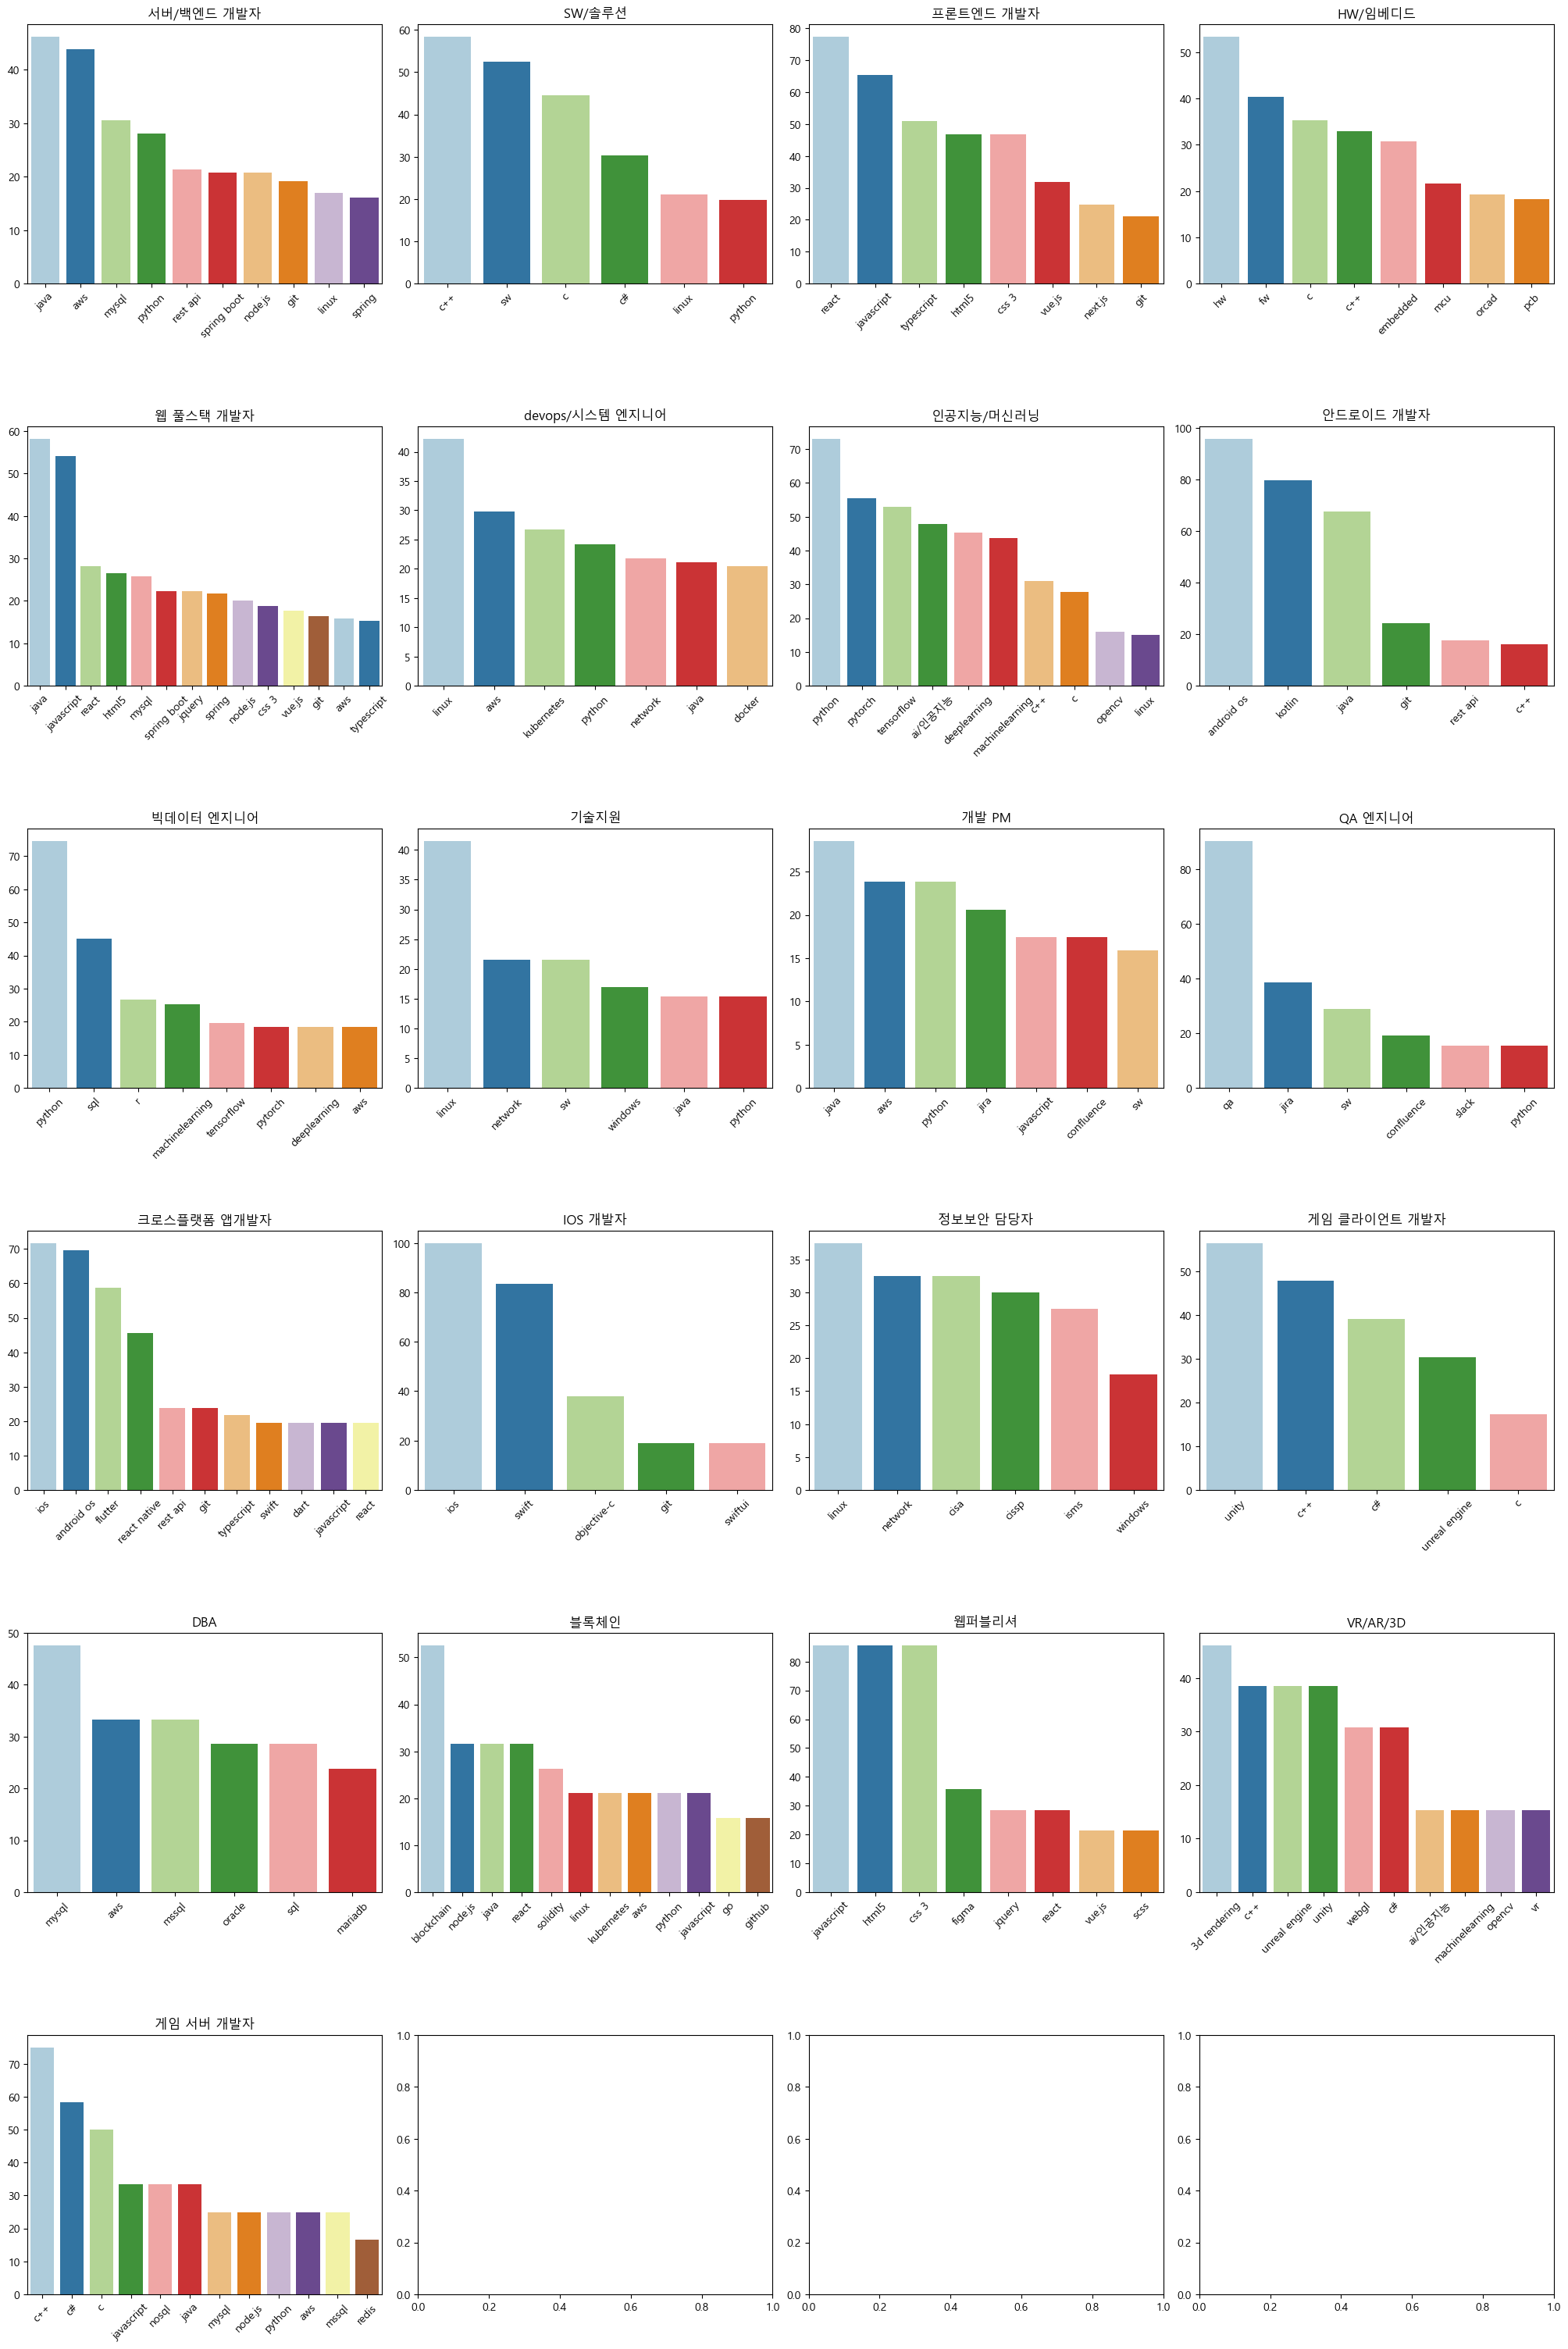

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(20, 30))
axs = axs.flatten()

for index in range(len(data)):
    bar_data = {stack: ratio for stack, ratio in data.techStacksTopN[index].items() if ratio > 15}
    sns.barplot(bar_data, ax=axs[index], palette='Paired').set(title=f'{data.jobCategories[index]}')
    axs[index].set_xticklabels(list(bar_data.keys()), rotation=45)

warnings.filterwarnings(action='default')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

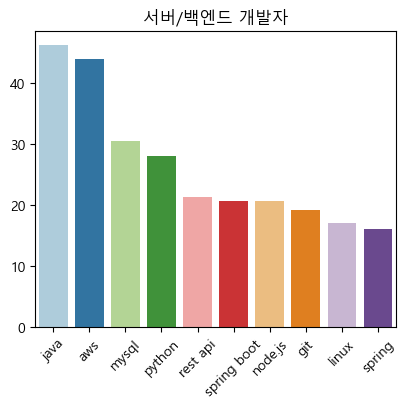

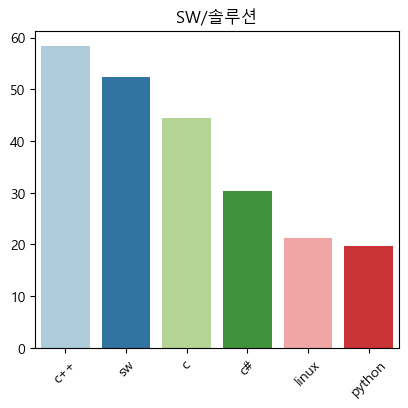

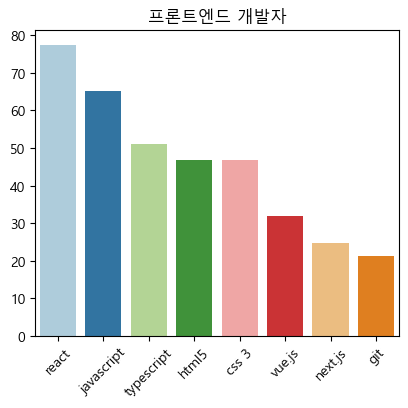

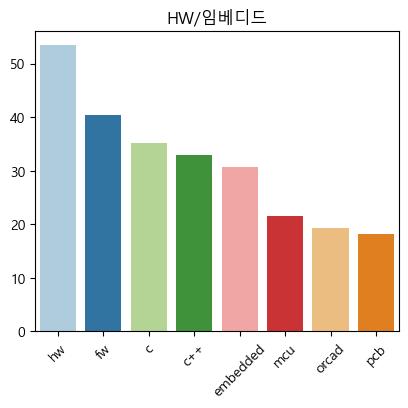

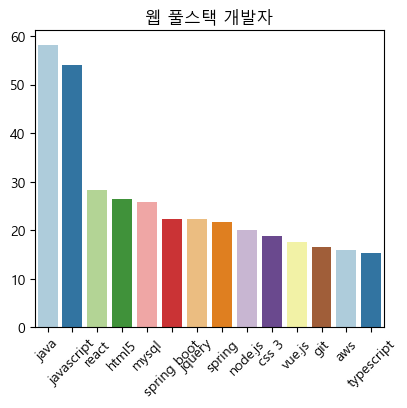

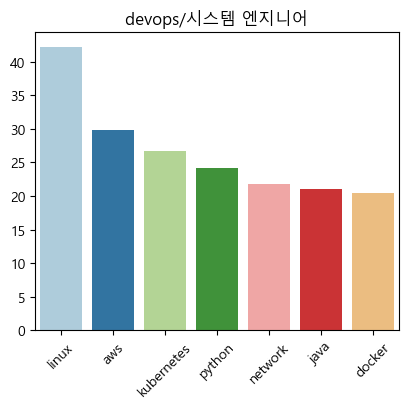

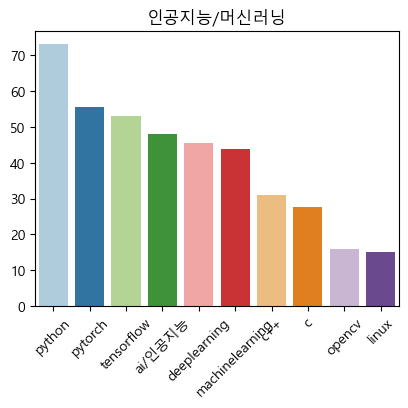

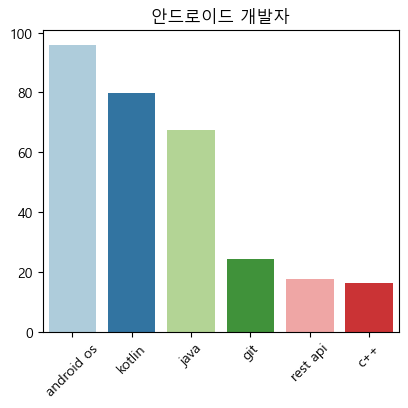

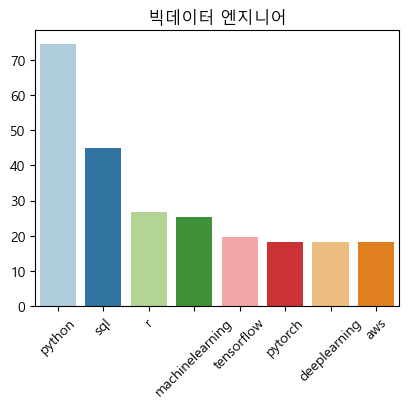

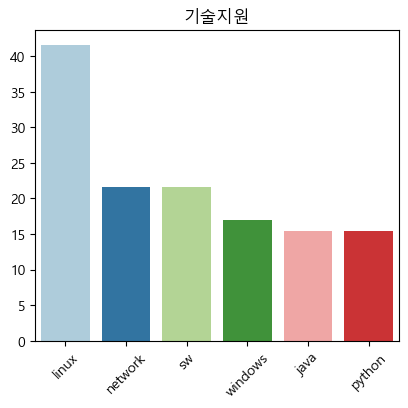

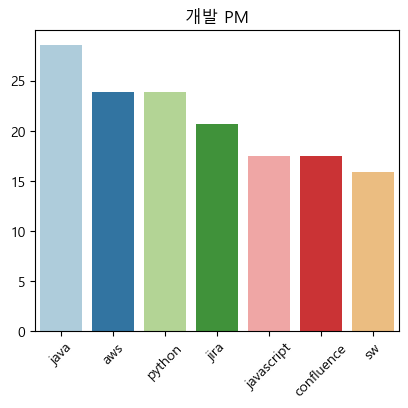

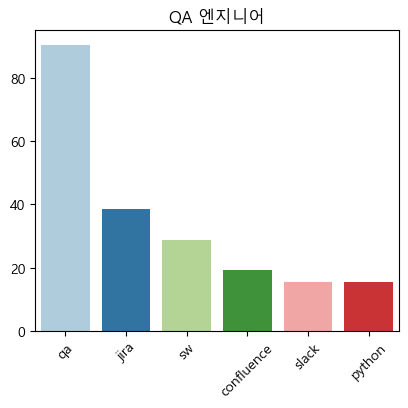

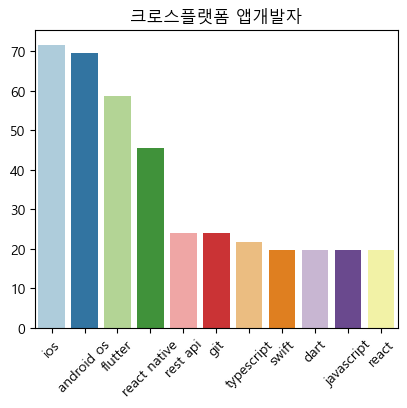

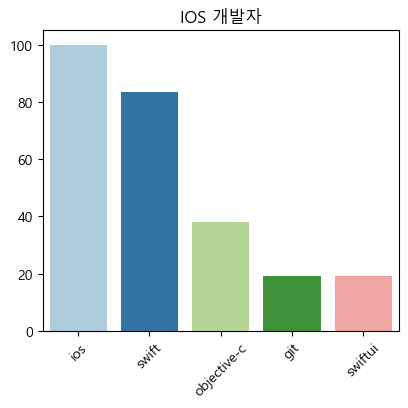

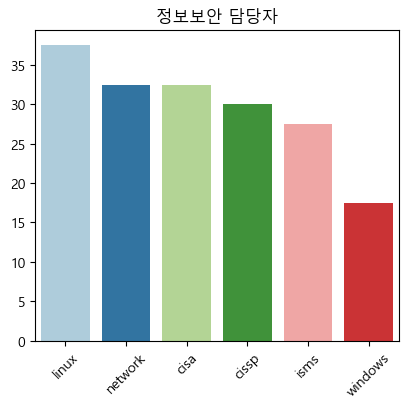

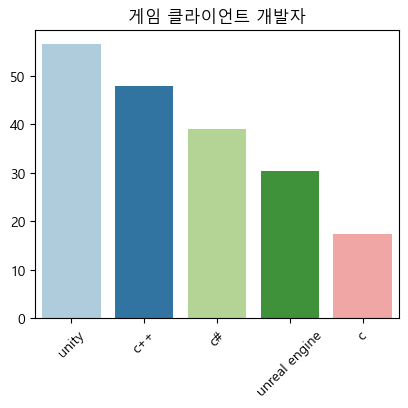

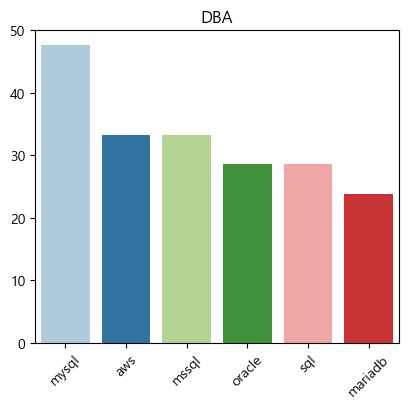

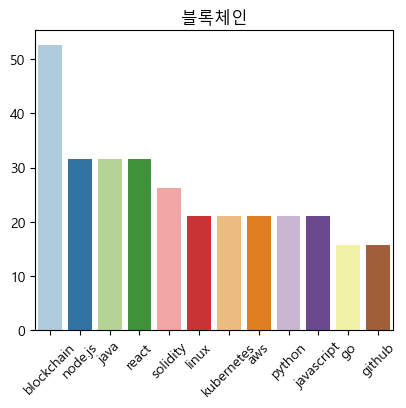

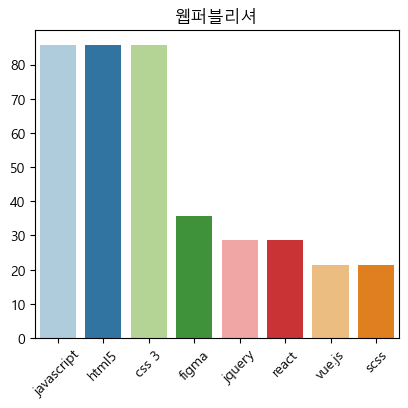

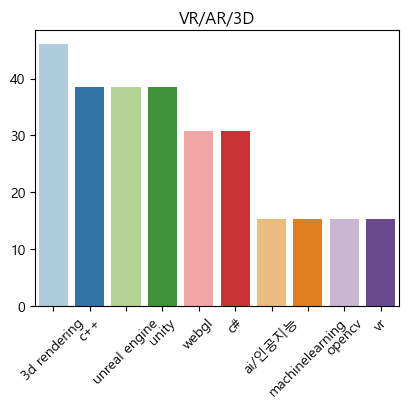

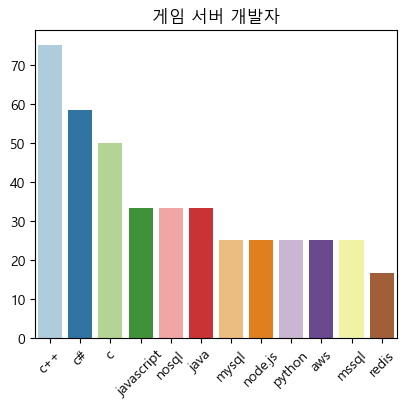

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import seaborn as sns
import matplotlib.pyplot as plt

os.makedirs("./bar_chart", exist_ok=True)

for index in range(len(data)):
    fig, ax = plt.subplots(figsize=(4, 4))
    bar_data = {stack: ratio for stack, ratio in data.techStacksTopN[index].items() if ratio > 15}
    sns.barplot(bar_data, ax=ax, palette='Paired').set(title=f'{data.jobCategories[index]}')
    ax.set_xticklabels(list(bar_data.keys()), rotation=45)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.savefig(f'./bar_chart/{data.jobCategories[index].replace('/', '_')}.png')

warnings.filterwarnings(action='default')